# Building a Handwritten Digits Image Classifier

## Project Objective

In this project, we will explore the task of image classification. We will delve into the challenges of image classification, with a focus on classifying handwritten digits. We will take into consideration the limitations of traditional modeling for image classification. We will train, test, and improve a few differeent neural networks for image classification. 

## Introduction

#### What makes image classification a challenging undertaking?

Each image in the training set is high-dimensional, with each pixel serving as a feature, resulting in a large number of features for each image. For instance, a 128 x 128 image corresponds to 16,384 features.

Due to computational constraints, images are often downscaled to lower resolutions and converted to grayscale. This downsizing, from high-resolution images with millions of features, sacrifices detail for faster processing.

The features in an image lack an obvious linear or nonlinear relationship that traditional models like linear or logistic regression can easily learn. In grayscale, each pixel is represented solely by a brightness value ranging from 0 to 256.

Here's an example of how an image is represented across the different abstractions we care about:


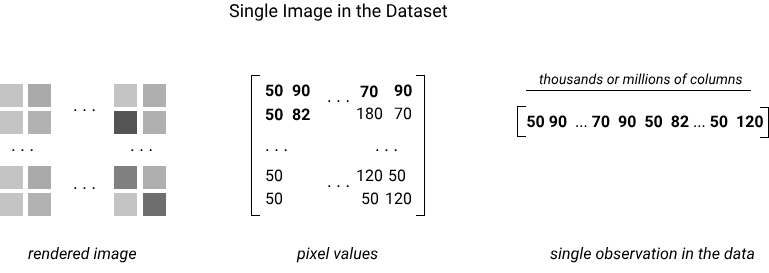

#### What attributes contribute to the effectiveness of deep learning in the realm of image classification?

Despite these challenges, deep learning has proven effective in image classification, primarily due to its ability to learn hierarchical representations. Deep learning models, especially convolutional neural networks (CNNs), excel at extracting intricate features at multiple layers of abstraction. For instance, in a CNN trained to identify faces, the initial layers might learn basic features like edges, followed by higher-level features such as eyes and noses, and ultimately culminating in complex facial representations.

Below is a diagram that visualizes what the weights represent at each layer of a convolutional neural network, a type of network that's often used in image classification. 

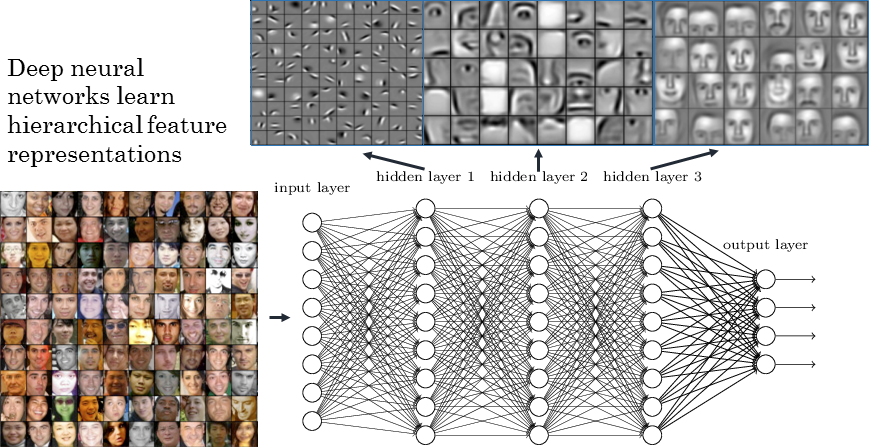



#### In this project, we will explore the practicality of deep, feedforward neural networks for image classification, aiming to understand their effectiveness in handling the complexities of handwritten digit recognition.


## Image Data Preparation

Scikit-learn offers a variety of datasets pre-loaded in the sklearn.datasets namespace, and the load_digits() function is specifically designed to retrieve a duplicate of the hand-written digits dataset from UCI.

As dataframes serve as a tabular representation of data, each image within this dataset is expressed as a row of pixel values. To visually represent an image from the dataframe accurately, it becomes necessary to transform these pixel values back to their original structure of 28 x 28 pixels. This involves reshaping the pixel values into the 28 by 28 format and plotting them on a coordinate grid to facilitate visualization.

### Setting up the environment

In [1]:
from sklearn.datasets import load_digits
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits_data = load_digits()

In [3]:
digits_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### Transforming the 2D array into a pandas dataframee

In [4]:
labels = pd.Series(digits_data['target'])

In [5]:
data = pd.DataFrame(digits_data['data'])

In [6]:
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

The dataframe contains 1797 rows x 64 columnns with no null values present. 

### Visualizing the Data

The first image in the dataset will be visualized to start.

In [8]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

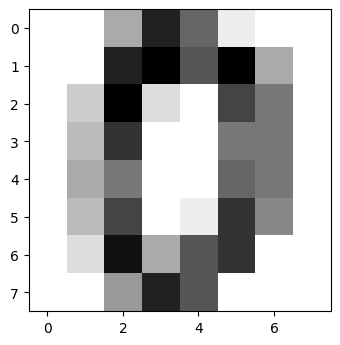

In [9]:
plt.imshow(np_image, cmap = 'gray_r')

A scatter plot grid of 4 columns x 2 rows will be generated to display images corresponding to rows 0, 100, 200, 300, 1000, 1100, 1200, and 1300 of the dataframe. 

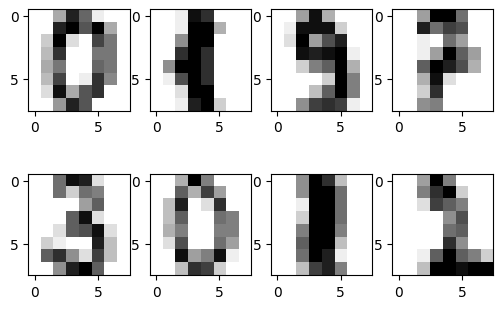

In [10]:
f, axarr = plt.subplots(2,4)

axarr[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap = 'gray_r')
axarr[0,1].imshow(data.iloc[99].values.reshape(8,8), cmap = 'gray_r')
axarr[0,2].imshow(data.iloc[199].values.reshape(8,8), cmap = 'gray_r')
axarr[0,3].imshow(data.iloc[299].values.reshape(8,8), cmap = 'gray_r')

axarr[1,0].imshow(data.iloc[999].values.reshape(8,8), cmap = 'gray_r')
axarr[1,1].imshow(data.iloc[1099].values.reshape(8,8), cmap = 'gray_r')
axarr[1,2].imshow(data.iloc[1199].values.reshape(8,8), cmap = 'gray_r')
axarr[1,3].imshow(data.iloc[1299].values.reshape(8,8), cmap = 'gray_r')

## Data Pipeline

The systematic flow of training, testing, and utilizing cross-validation for robust model evaluation will be defined here, as they are used accross various machine learning models.

def train(model_parameter, X_train, y_train):

    Fits a machine learning model on the train dataset.
    
    Args:
        model_parameter: Defines number of units within the model
        X_train: Input data/features for the training set
        y_train: Corresponding labels or target values for the training set
        
    Returns:
        model.fit(X_train, y_train)
        
    # Create a model with the specified number of units
    model = model(units = model_parameter)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Return the fitted model
    return knn
    
def test(model, X_test, y_test):

    Tests a machine learning model on the test and train datasets.
    
    Args:
        model: Machine learning model to use
        X_train: Input data/features for the training set
        y_train: Corresponding labels or target values for the training set
        
    Returns:    
        test_accuracy: Accuracy score for the given model on the train dataset
        
    # Generate predictions using the trained model on the test data.
    predictions = model.predict(X_test)
    
    # Create a DataFrame to compare correct labels with predicted labels.
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = y_test
    train_test_df['predicted_label'] = predictions 
    
    # Calculate overall accuracy by comparing predicted labels with correct labels.
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"]) / len(train_test_df)
    
    # Return the test accuracy of the model on the test data.
    return test_accuracy

def cross_validate(x):

    Use a 4-folds cross validation model on a machine learning model.
    
    Args:
        x: Defines the number of units that will be passed within the selected model's parameters 
        
    Returns:
        test_accuracy: Average accuracy score over the 4 folds conducted on the test dataset 
        train_accuracy: Average accuracy score over the 4 folds conducted on the train dataset
        
    # Initializes empty lists to store test and train accuracy scores
    test_accuracies = []
    train_accuracies = []
    
    kf = KFold(n_splits=4, shuffle=True, random_state=1)
    
    # Split into train and test datasets after randomization, for each fold
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.loc[train_index], data.loc[test_index]
        y_train, y_test = labels.loc[train_index], labels.loc[test_index
        
        # Train the model
        model = train_knn(k, X_train, y_train)
        
        # Make predictions
        test_acuracy = test_knn(model, X_test, y_test)
        train_accuracy = test_knn(model, X_train, y_train)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(overall_acuracy)
        

## K-Nearest Neighbors Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split



def train_knn(nneighbors, X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(X_train, y_train)
    return knn 

def test_knn(model, X_test, y_test):
    predictions = model.predict(X_test)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = y_test
    train_test_df['predicted_label'] = predictions 
    test_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)
    return test_accuracy

def cross_validate_knn(k):
    test_accuracies = []
    train_accuracies = []
    kf = KFold(n_splits = 4, random_state = 2, shuffle = True)
    for train_index, test_index in kf.split(data):
        X_train, X_test = data.loc[train_index], data.loc[test_index]
        y_train, y_test = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, X_train, y_train)
        test_acuracy = test_knn(model, X_test, y_test)
        train_accuracy = test_knn(model, X_train, y_train)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_acuracy)
    return test_accuracies, train_accuracies

# k-fold cross-validation is performed for a k-NN classifier with k=1
knn_one_accuracies = cross_validate_knn(1)

# Mean accuracy across all folds is calculated
mean_accuracy = np.mean(knn_one_accuracies)


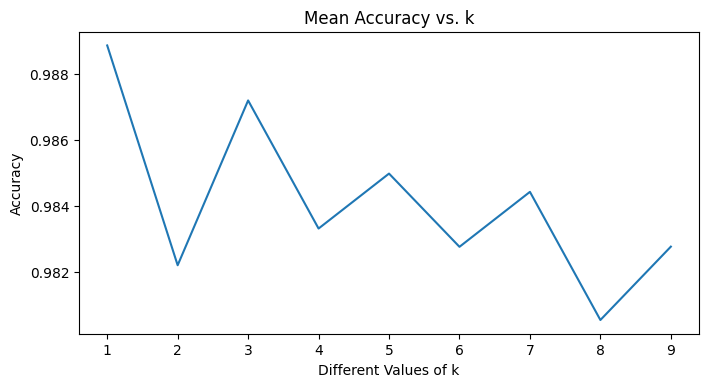

In [18]:
# Iterate over different values of k to perform k-fold cross-validation for each k,
# calculate mean accuracies for both test and training sets, and plot the results.

# Define range of k values from 1 to 9.
k_values = list(range(1, 10))

# Initialize lists to store mean accuracies for test and training sets.
k_test_accuracies = []
k_train_accuracies = []

# Iterate over each value of k.
for k in k_values:
    # Perform k-fold cross-validation for current k.
    k_test_accuracy, k_train_accuracy = cross_validate_knn(k)
    
    # Calculate mean accuracies for both test and training sets.
    k_mean_test_accuracy = np.mean(k_test_accuracy)
    k_mean_train_accuracy = np.mean(k_train_accuracy)
    
    # Append mean accuracies to the respective lists.
    k_test_accuracies.append(k_mean_test_accuracy)
    k_train_accuracies.append(k_mean_train_accuracy)

# Plot the mean accuracies against different values of k.
plt.figure(figsize=(8, 4))
plt.title("Mean Accuracy vs. k")
plt.xlabel("Different Values of k")
plt.ylabel("Accuracy")
plt.plot(k_values, k_test_accuracies)


The plot above illustrates consistently high accuracy scores across various values k that were tested. The peak accuracy, approximately 98.9%, is achieved with a k value of 1. 

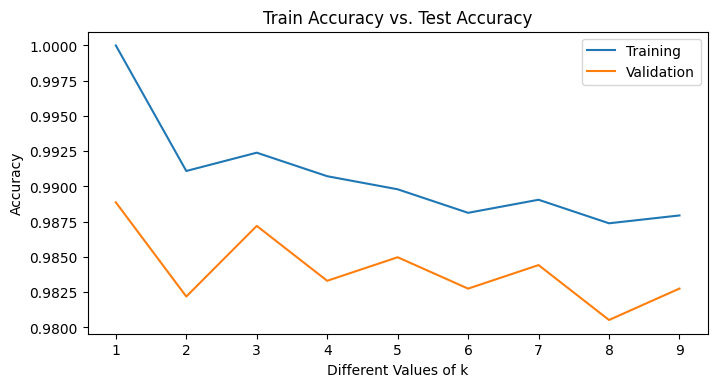

In [29]:
# Create a plot to visualize the relationship between training and test accuracies

plt.figure(figsize=(8,4))
plt.title("Train Accuracy vs. Test Accuracy")
plt.plot(k_values, k_train_accuracies, label = 'Training')
plt.plot(k_values, k_test_accuracies, label = 'Validation')
plt.legend()
plt.xlabel("Different Values of k")
plt.ylabel("Accuracy")
plt.show()

The plot above illustrates that with the high accuracy scores observed on the test dataset, there is minimal indication of overfitting. The model's performance on the training set is consistently strong, suggesting that it generalizes well to the underlying patterns in the data without excessively tailoring itself to the training samples.

Despite the model's high accuracy on both the training and testing dataste, there are some negative attributed of utilizing k-nearest neighbors:

1.) High Memory Usage:

The method consumes significant memory, particularly when dealing with new, unseen observations. This is due to the necessity of conducting numerous comparisons with existing observations.

2.) Lack of Model Representation for Exploration:

K-nearest neighbors lacks a tangible model representation that could facilitate debugging and exploration. Unlike some other models, it doesn't offer insights into the underlying patterns or features contributing to its predictions.

Below we will explore the performance of neural networks with different numbers of hidden layers and neurons. 

## Neural Network With One Hidden Layer

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

# common framework across all models utilized

def train_nn(nn_neurons, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes = nn_neurons)
    nn.fit(train_features, train_labels)
    return nn

def test_nn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    test_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return test_accuracy

def cross_validate_nn(nn_neurons):
    test_accuracies = []
    train_accuracies = []
    kf = KFold(n_splits = 4, random_state = 2, shuffle = True)
    for train_index, test_index in kf.split(data):
        X_train, X_test = data.loc[train_index], data.loc[test_index]
        y_train, y_test = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(nn_neurons, X_train, y_train)
        test_acuracy = test_nn(model, X_test, y_test)
        train_accuracy = test_nn(model, X_train, y_train)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_acuracy)
    return test_accuracies, train_accuracies


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

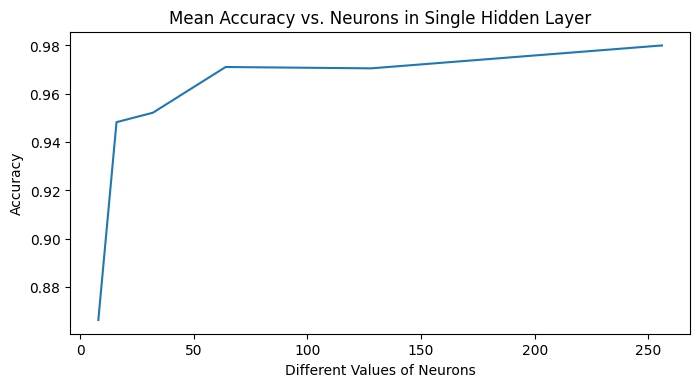

In [22]:

# Define range of neuron configurations for single hidden layer in neural network
nn_one_neurons = [
    
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]

# Initialize lists to store mean accuracies for test and training sets
nn_one_test_accuracies = []
nn_one_train_accuracies = []

# Iterate over each configuration of neurons in single hidden layer
for nn_neurons in nn_one_neurons:
    nn_test_accuracies, nn_train_accuracies = cross_validate_nn(nn_neurons)
    nn_mean_test_accuracy = np.mean(nn_test_accuracies)
    nn_mean_train_accuracy = np.mean(nn_train_accuracies)
    nn_one_test_accuracies.append(nn_mean_test_accuracy)
    nn_one_train_accuracies.append(nn_mean_train_accuracy)

# Plot mean test accuracies against different configurations of neurons.
plt.figure(figsize = (8,4))
plt.title('Mean Accuracy vs. Neurons in Single Hidden Layer')
x = [i[0] for i in nn_one_neurons]
plt.xlabel("Different Values of Neurons")
plt.ylabel("Accuracy")
plt.plot(x, nn_one_test_accuracies)
    

The depicted plot showcases elevating accuracy scores for tested neuron values. The peak accuracy, which is around 97%, occurrs with 64 neurons. Beyond this point, there is marginal improvement observed, suggesting that increasing the number of neurons does not significantly enhance performance.

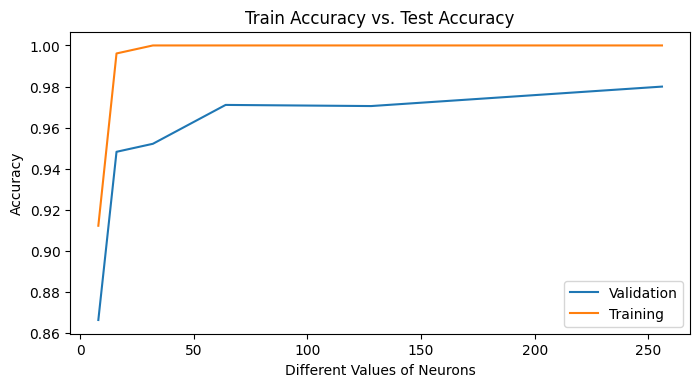

In [30]:
# Create a plot to visualize the relationship between training and test accuracies

plt.figure(figsize = (8,4))
plt.title('Train Accuracy vs. Test Accuracy')
plt.plot(nn_one_neurons, nn_one_test_accuracies, label = 'Validation')
plt.plot(nn_one_neurons, nn_one_train_accuracies, label = 'Training')
plt.legend()
plt.xlabel("Different Values of Neurons")
plt.ylabel("Accuracy")
plt.show()

The plot above indicates consistently robust performance on the test dataset, suggesting limited signs of overfitting. However, a significant concern to take note of is the consistent perfect training accuracy at 100%. This signifies the potential that the model will memorize details specific to the training data. This could raise concerns about the model's ability to adapt to new and unseen data. The high test scores however, indicate effective handling of the validation set. Striking a balance between achieving high training accuracy and ensuring robust generalization remains a significant factor for model evaluation and refinement.

Below we will test a neural network with two hidden layers.

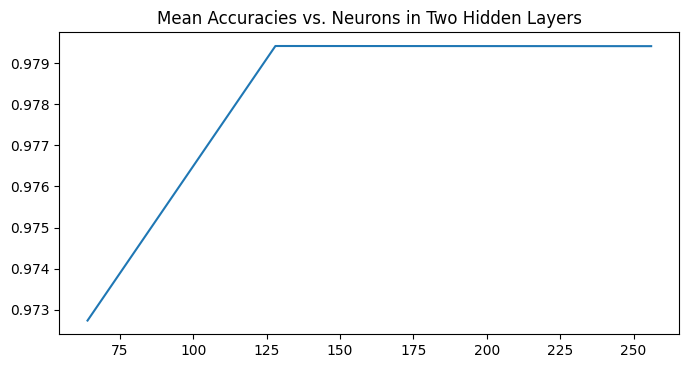

In [24]:

# Define range of neuron configurations for two hidden layers in neural network
nn_two_neurons = [
    
    (64,64),
    (128,128),
    (256,256)
]

# Initialize lists to store mean accuracies for test and training sets
nn_two_test_accuracies = []
nn_two_train_accuracies = []

# Iterate over each configuration of neurons in two hidden layers
for nn_neurons in nn_two_neurons:
    nn_test_accuracies, nn_train_accuracies = cross_validate_nn(nn_neurons)
    nn_mean_test_accuracy = np.mean(nn_test_accuracies)
    nn_mean_train_accuracy = np.mean(nn_train_accuracies)
    nn_two_test_accuracies.append(nn_mean_test_accuracy)
    nn_two_train_accuracies.append(nn_mean_train_accuracy)
    
# Plot mean test accuracies against different configurations of neurons
plt.figure(figsize = (8,4))
plt.title('Mean Accuracies vs. Neurons in Two Hidden Layers')
x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_test_accuracies)


The depicted plot showcases elevating accuracy scores for tested neuron values. The peak accuracy, which is around 97.95%, occurrs with 128 neurons. Beyond this point, there is no improvement observed, suggesting that increasing the number of neurons does not enhance performance.

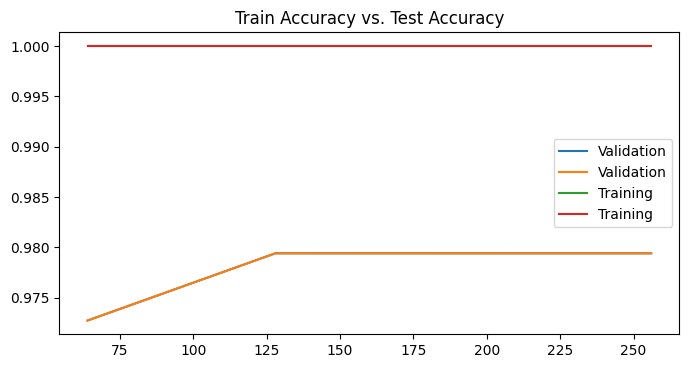

In [31]:
# Create a plot to visualize the relationship between training and test accuracies

plt.figure(figsize = (8,4))
plt.title('Train Accuracy vs. Test Accuracy')
plt.plot(nn_two_neurons, nn_two_test_accuracies, label = 'Validation')
plt.plot(nn_two_neurons, nn_two_train_accuracies, label = 'Training')
plt.legend()
plt.show()

As seen with the single hidden layer neural network, the plot above indicates consistently robust performance on the test dataset, suggesting limited signs of overfitting. However, we still see a concern with the consistent perfect training accuracy at 100%.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



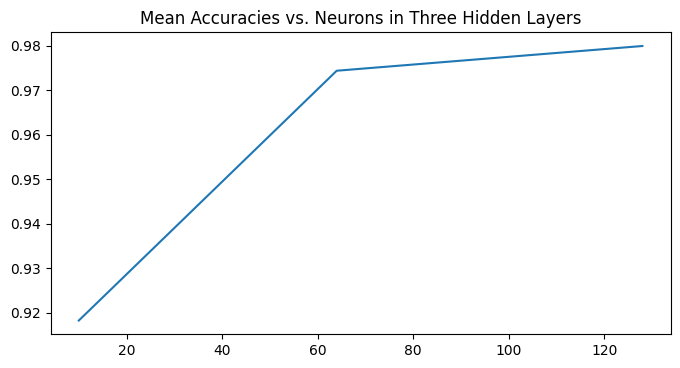

In [26]:

# Define range of neuron configurations for three hidden layers in neural network
nn_three_neurons = [
    
    (10,10,10),
    (64,64,64),
    (128,128,128)
]

# Initialize lists to store mean accuracies for test and training sets
nn_three_test_accuracies = []
nn_three_train_accuracies = []

# Iterate over each configuration of neurons in three hidden layers
for nn_layers in nn_three_neurons:
    nn_test_accuracies, nn_train_accuracies = cross_validate_nn(nn_layers)
    nn_mean_test_accuracy = np.mean(nn_test_accuracies)
    nn_mean_train_accuracy = np.mean(nn_train_accuracies)
    nn_three_test_accuracies.append(nn_mean_test_accuracy)
    nn_three_train_accuracies.append(nn_mean_train_accuracy)
    
# Plot mean test accuracies against different configurations of neurons
plt.figure(figsize = (8,4))
plt.title('Mean Accuracies vs. Neurons in Three Hidden Layers')
x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_test_accuracies)


The depicted plot showcases elevating accuracy scores for tested neuron values. The peak accuracy, which is around 97.25%, occurrs with 64 neurons. Beyond this point, there is marginal improvement observed, suggesting that increasing the number of neurons does not significantly enhance performance.

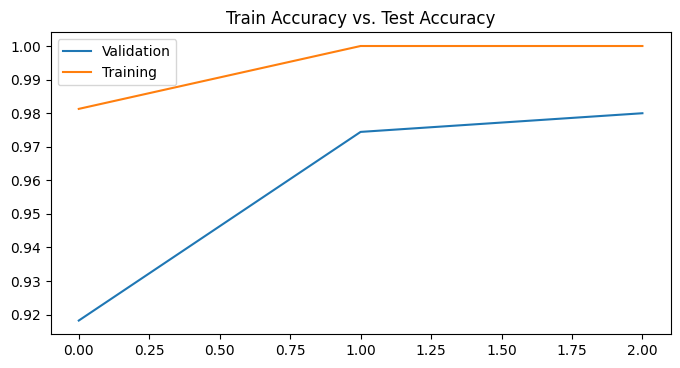

In [27]:
# Create a plot to visualize the relationship between training and test accuracies

plt.figure(figsize = (8,4))
plt.title('Train Accuracy vs. Test Accuracy')
plt.plot(range(len(nn_three_test_accuracies)), nn_three_test_accuracies, label = 'Validation')
plt.plot(range(len(nn_three_train_accuracies)), nn_three_train_accuracies, label = 'Training')
plt.legend()
plt.show()

As seen with the single hidden layer and two hidden layers neural networks, the plot above indicates consistently robust performance on the test dataset, suggesting limited signs of overfitting. After the point of 64 neurons we see once again the concern of consistent perfect training accuracy at 100%.

## Concluding Remarks and Next Steps

In summary, the models tested in this project, including k-nearest neighbors and neural networks, have demonstrated effective performance in classifying the given images. The high accuracy scores achieved with both models indicate their proficiency in capturing and recognizing patterns within the image data. However, as with any modeling endeavor, there is always room for improvement.

For future enhancements, considerations may include:

Hyperparameter Tuning:

Further exploration of hyperparameter tuning, especially for the k-nearest neighbors model (e.g., optimal choice of k), could potentially refine the model's performance.
Model Complexity:

In the case of neural networks, experimenting with different architectures, including variations in the number of hidden layers and neurons, might offer insights into optimizing the model's capacity for image classification.
Data Augmentation:

Implementing data augmentation techniques could contribute to diversifying the dataset, potentially enhancing the model's ability to generalize to a broader range of image variations.
Ensemble Methods:

Exploring ensemble methods, such as combining predictions from multiple models, could be beneficial in further boosting overall classification performance.
Transfer Learning:

Considering the application of transfer learning, leveraging pre-trained models on larger image datasets, may offer advantages in capturing intricate features relevant to image classification tasks.
By iteratively incorporating these potential improvements, we aim to continually refine and elevate the models' capabilities for accurate and robust image classification in future iterations of this project.